## Turkey Teacher Salary Data Analysis And Data Preprocessing

## Project Objective: Analysis of Teacher Salaries in Turkey

The aim of this project is to analyze teacher salaries in Turkey in terms of regional, demographic, and economic factors. Data preprocessing will address missing and outlier values, followed by visualizing salary distributions based on regions, experience levels, and years. The results will help understand salary disparities and provide insights for educational policy recommendations.


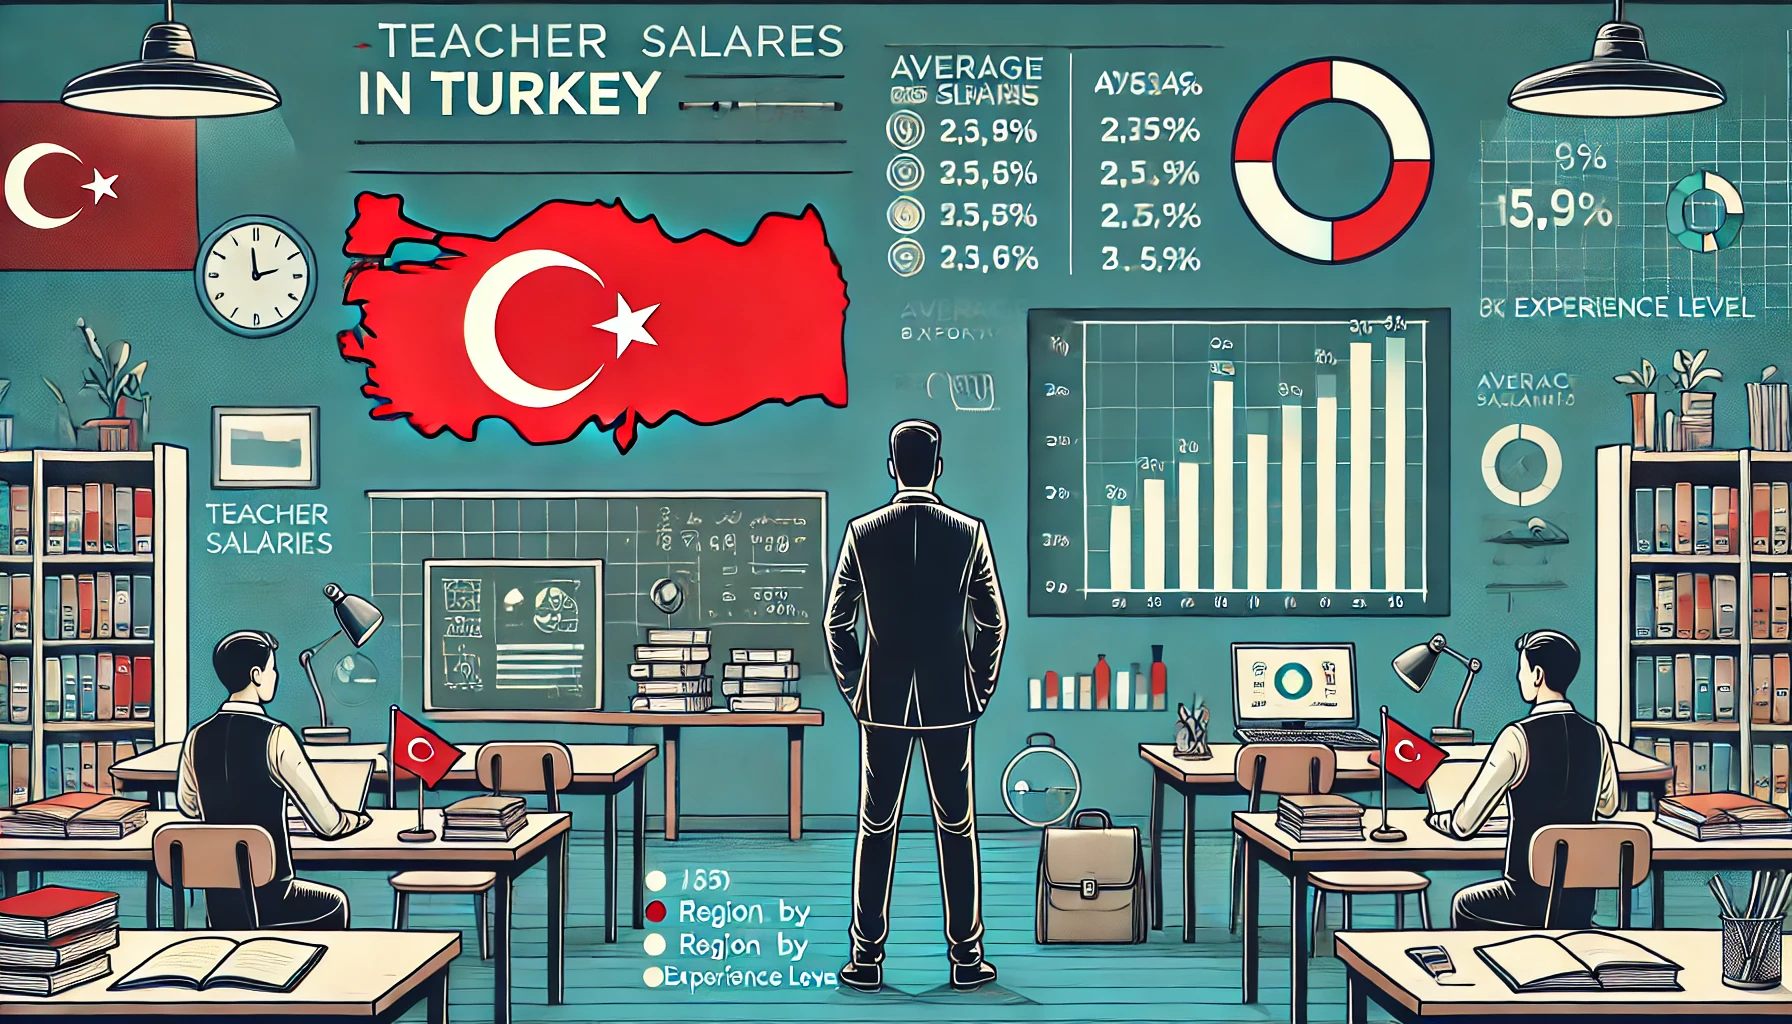

## Analisis Content

1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Data Analisis And İmport](#3)
4. [Missing Data Analysis](#4)
5. [Data Analysis](#5)

<a id= "1"></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/turkey-teacher-salary-and-minimum-salary/turkish_salary.csv


<a id = "2"></a>
## Data Content

 **year**: The year the data belongs to.
 
 **teacher**: The salary amount teachers received in that year.
 
 **minimum_salary**: The minimum wage amount in that year.

<a id = "3"></a>
## Data Analisis And İmport

In [2]:
df = pd.read_csv("/kaggle/input/turkey-teacher-salary-and-minimum-salary/turkish_salary.csv")

In [3]:
df.head(3)

,Unnamed: 0,year,teacher,mininum_salary
0,0,2002,635.20,163
1,1,2003,734.00,225
2,2,2004,831.82,303


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21.0,10.000000,6.204837,0.0,5.0,10.0,15.0,20.0
year,21.0,2012.000000,6.204837,2002.0,2007.0,2012.0,2017.0,2022.0
teacher,21.0,2819.715238,2080.068004,635.2,1261.0,2276.0,3618.0,8600.0
mininum_salary,21.0,1156.285714,1233.003696,163.0,403.0,701.0,1404.0,5500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      21 non-null     int64  
 1   year            21 non-null     int64  
 2   teacher         21 non-null     float64
 3   mininum_salary  21 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 800.0 bytes


<a id = "4"></a>
## Missing Data Analysis

In [6]:
df.isnull().sum()

Unnamed: 0        0
year              0
teacher           0
mininum_salary    0
dtype: int64

* There's no missing data.

<a id = "5"></a>
## Data Analysis

In [7]:
df.groupby("year")[['teacher','mininum_salary']].sum()

,teacher,mininum_salary
year,,
2002,635.20,163
2003,734.00,225
2004,831.82,303
2005,909.00,350
2006,1133.00,380
2007,1261.00,403
2008,1560.00,481
2009,1699.00,527
2010,1808.00,576


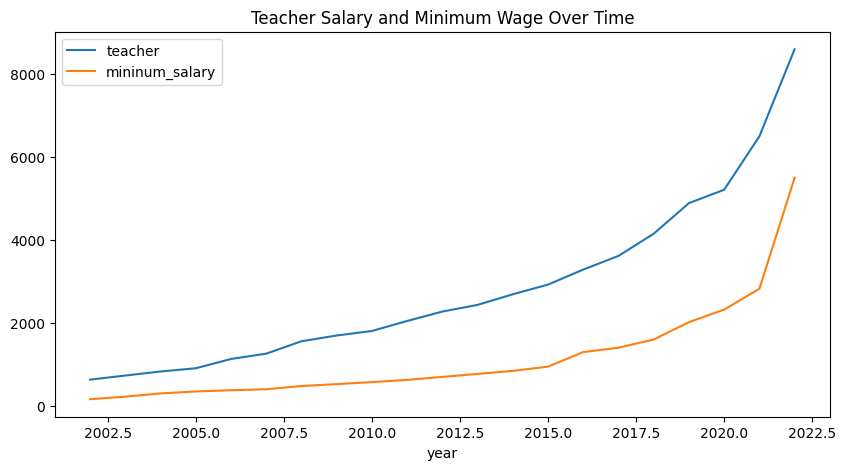

In [8]:
df.groupby("year")[['teacher','mininum_salary']].sum().plot(kind = "line", figsize=(10,5), title = "Teacher Salary and Minimum Wage Over Time")
plt.show()

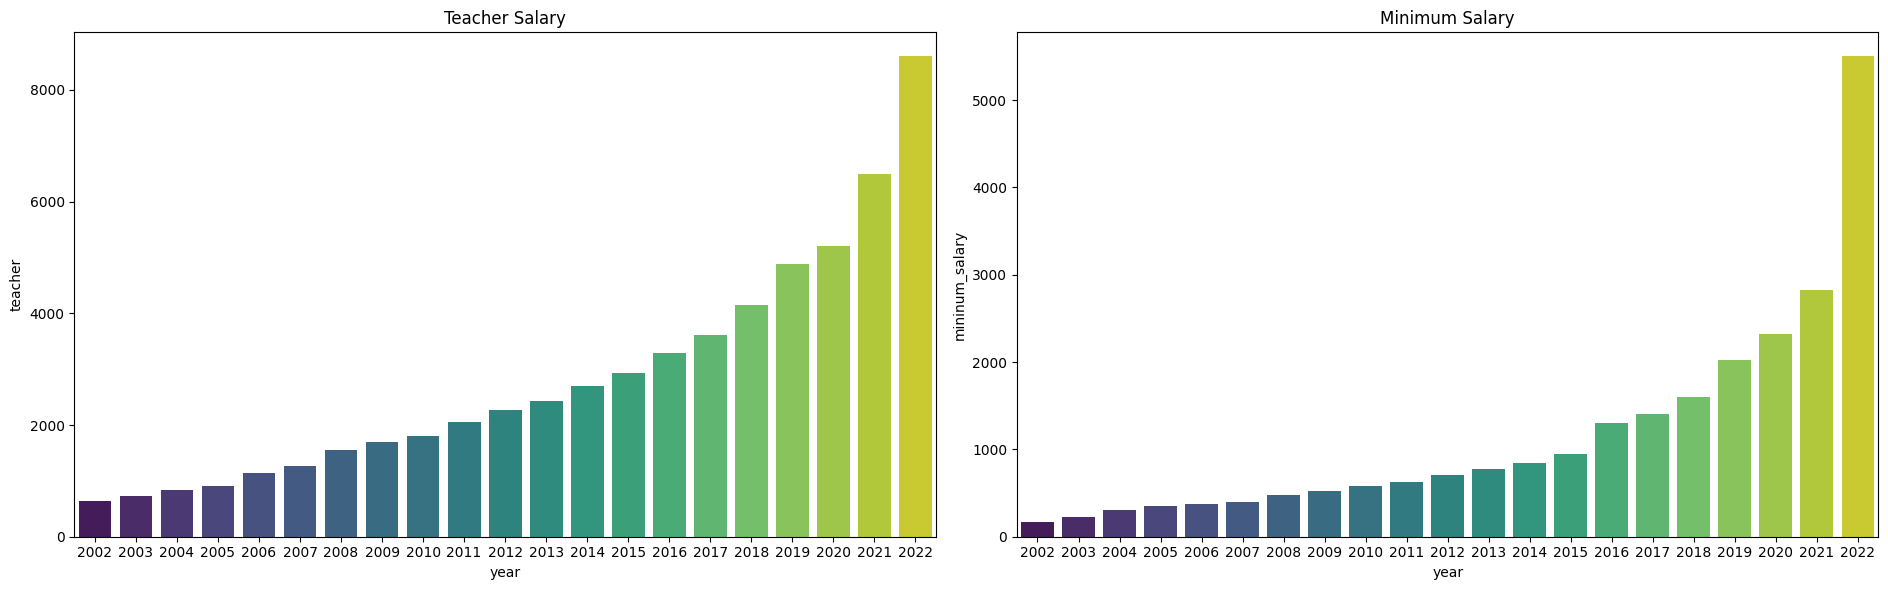

In [9]:
plt.figure(figsize=(19, 6))

# Teacher Salary Barplot
plt.subplot(1, 2, 1)
sns.barplot(x="year", y="teacher", data=df, palette="viridis")
plt.title("Teacher Salary")

# Minimum Wage Barplot
plt.subplot(1, 2, 2)
sns.barplot(x="year", y="mininum_salary", data=df, palette="viridis")
plt.title("Minimum Salary")

plt.tight_layout()
plt.show()


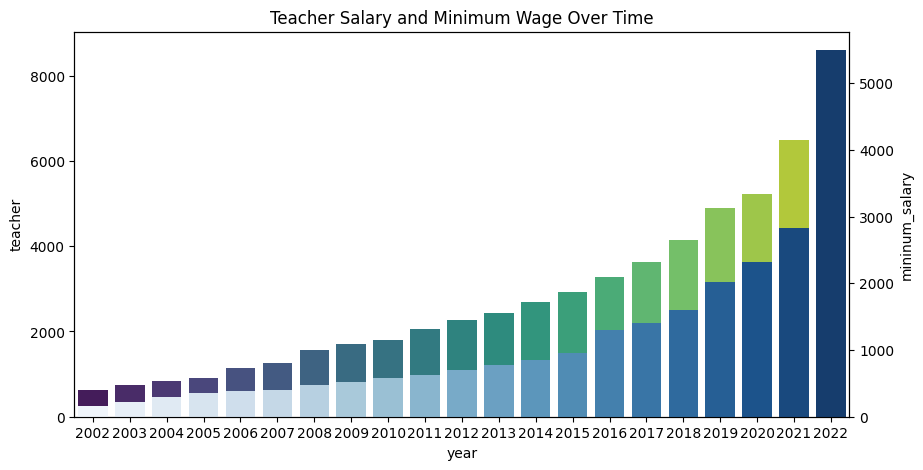

In [10]:
plt.figure(figsize=(10, 5))

# İlk y ekseni için Teacher Salary Barplot
sns.barplot(x="year", y="teacher", data=df, palette="viridis")

# İkinci y ekseni için Minimum Salary Barplot
ax2 = plt.gca().twinx()
sns.barplot(x="year", y="mininum_salary", data=df, palette="Blues", ax=ax2)
plt.title("Teacher Salary and Minimum Wage Over Time")

plt.show()


* The transparent color represents the minimum wage, while the darker colors represent the teacher's salary.

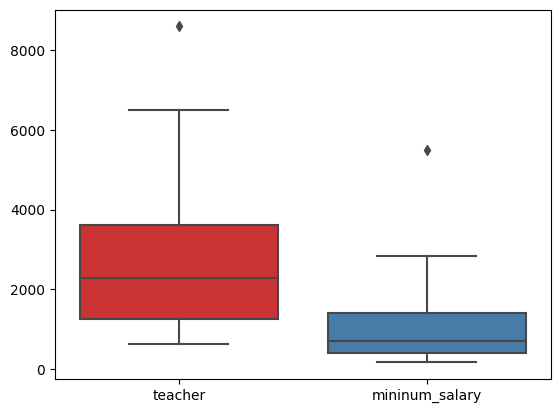

In [11]:
sns.boxplot(data = df[['teacher','mininum_salary']], palette = "Set1")
plt.show()

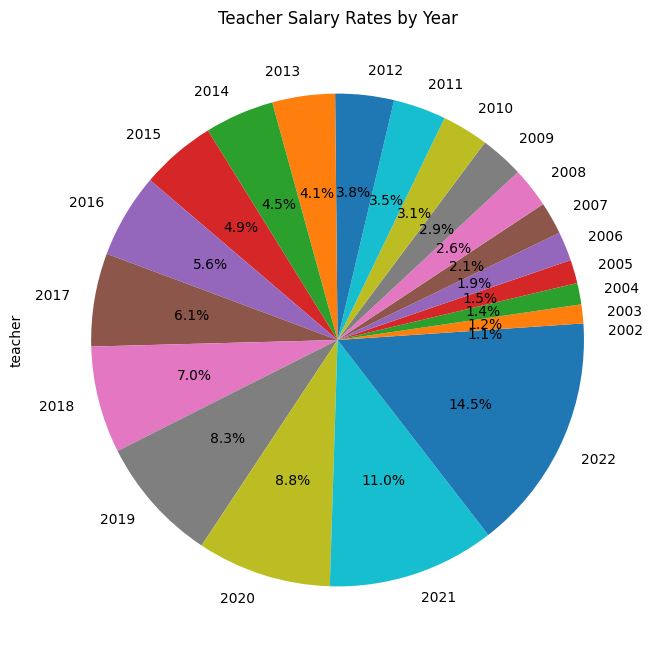

In [12]:
df.groupby("year")["teacher"].sum().plot(kind="pie", figsize=(8,8), title="Teacher Salary Rates by Year", autopct='%1.1f%%')  
plt.show()

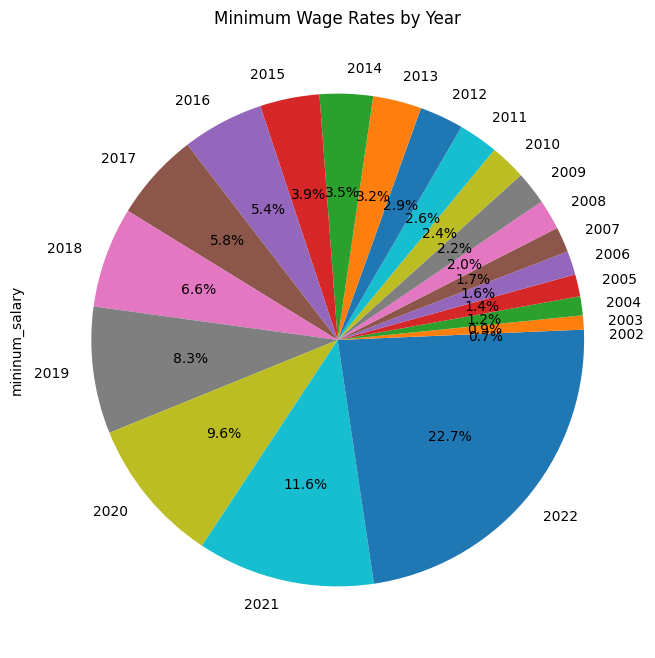

In [13]:
df.groupby("year")["mininum_salary"].sum().plot(kind="pie", figsize=(8,8), title="Minimum Wage Rates by Year", autopct='%1.1f%%')  
plt.show()

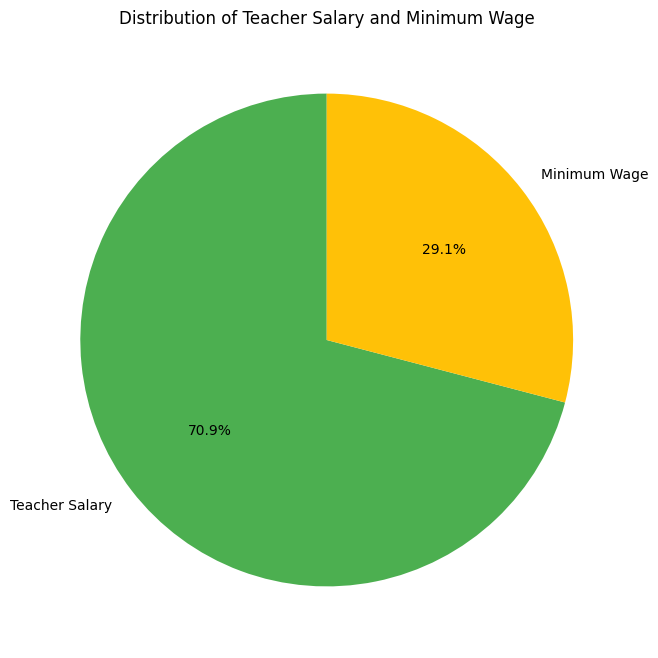

In [14]:
# Teacher ve Minimum Salary verilerinin toplamlarını alıyoruz
salaries = [df['teacher'].sum(), df['mininum_salary'].sum()]
labels = ['Teacher Salary', 'Minimum Wage']

# Pasta grafiği
plt.figure(figsize=(8, 8))
plt.pie(salaries, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'], startangle=90)
plt.title('Distribution of Teacher Salary and Minimum Wage')
plt.show()